<a href="https://colab.research.google.com/github/laasyarg/Housing-data-set/blob/main/Statistics_of_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dmba

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

%matplotlib inline

## Load file and generate training and validation sets.

In [ ]:
#GLR65
# Load data frame and select columns for regression analysis
car_dfGLR65 = dmba.load_data('ToyotaCorolla.csv')

# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')
predictors = [s for s in car_dfGLR65.columns if s not in excludeColumns]
outcome = 'Price'

# partition data
X = car_dfGLR65[predictors]
y = car_dfGLR65[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

# evaluate performance
# training
regressionSummary(train_y, reg.predict(train_X))
# validation
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1121.0606
            Mean Absolute Error (MAE) : 811.6770
          Mean Percentage Error (MPE) : -0.8630
Mean Absolute Percentage Error (MAPE) : 8.0054

Regression statistics

                      Mean Error (ME) : 97.1891
       Root Mean Squared Error (RMSE) : 1382.0352
            Mean Absolute Error (MAE) : 880.1396
          Mean Percentage Error (MPE) : 0.0138
Mean Absolute Percentage Error (MAPE) : 8.8744


<span style="color:red">
Repeat the same regression with 80% of the data set randomly assigned to training.
</span>

In [ ]:
#GLR65
# Load data frame and select columns for regression analysis
car_dfGLR65 = dmba.load_data('ToyotaCorolla.csv')

# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')
predictors = [s for s in car_dfGLR65.columns if s not in excludeColumns]
outcome = 'Price'

# partition data
X = car_dfGLR65[predictors]
y = car_dfGLR65[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

# evaluate performance
# training
regressionSummary(train_y, reg.predict(train_X))
# validation
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1116.2328
            Mean Absolute Error (MAE) : 817.9854
          Mean Percentage Error (MPE) : -0.9418
Mean Absolute Percentage Error (MAPE) : 8.1533

Regression statistics

                      Mean Error (ME) : 214.9915
       Root Mean Squared Error (RMSE) : 1682.2767
            Mean Absolute Error (MAE) : 883.8039
          Mean Percentage Error (MPE) : 0.9495
Mean Absolute Percentage Error (MAPE) : 8.5917


## Prediction Error

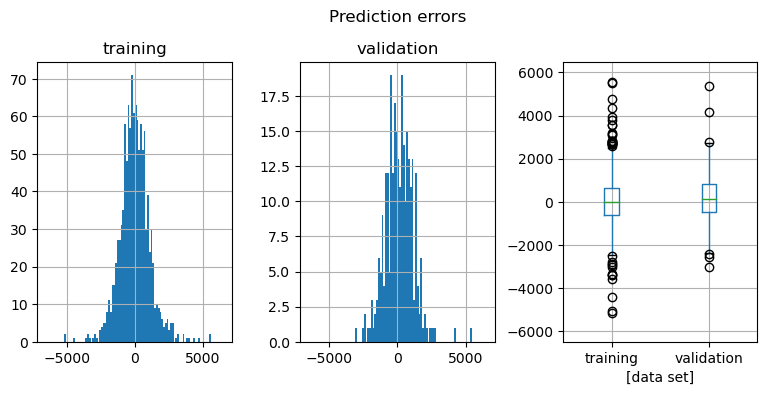

In [ ]:
#GLR65
pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_X),
    'data set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - reg.predict(valid_X),
    'data set': 'validation'
})
boxdata_df = pd.concat([pred_error_train, pred_error_valid])

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9, 4)
common = {'bins': 100, 'range': [-6500, 6500]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-6500, 6500)
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.15, top=0.85, wspace=0.35)

plt.show()

<span style="color:red">
Which of training and validation partitions has more outliers?
    <br> Answer: Training partitions has more outliers
</span>

## Cumulative Gains and Lift Chart

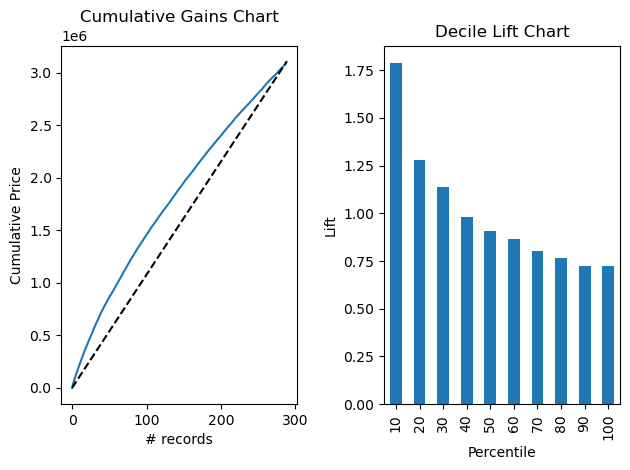

Lift based on meanResponse 1.7905286323707363
Expected cumulative price for 10% random sales 310605.4
Cumulative price for top 10% sales 960900
Lift calculated based on gains chart 3.0936358479279495


In [ ]:
#GLR65
# sort the actual values in descending order of the prediction
df = pd.DataFrame({
    'predicted': reg.predict(valid_X),
    'actual': valid_y,
})
df = df.sort_values(by=['predicted'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(df['actual'], ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(df['actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()


# group the sorted predictions into 10 roughly equal groups and calculate the mean
sorted_act_v = df['actual']
groups = [int(10 * i / len(sorted_act_v)) for i in range(len(sorted_act_v))]
meanPercentile = sorted_act_v.groupby(groups).mean()
meanResponse = meanPercentile / sorted_act_v.mean()
meanResponse.index = (meanResponse.index + 1) * 10
print('Lift based on meanResponse', meanResponse[10])
random10 = sorted_act_v.cumsum().iloc[-1] / 10  # expected cumulative price without lift for 10% sales
cumPred10 = sorted_act_v.cumsum().iloc[57]  # cumulative price based on model for top 10%
print('Expected cumulative price for 10% random sales', random10)
print('Cumulative price for top 10% sales', cumPred10)
print('Lift calculated based on gains chart', cumPred10 / random10)

## Confusion Matrix

In [ ]:
#GLR65
owner_dfGLR65= dmba.load_data('ownerExample.csv')
owner_dfGLR65.head()
class_names = ['nonowner', 'owner']

In [ ]:
#GLR65
predicted = ['owner' if p > 0.5 else 'nonowner' for p in owner_dfGLR65.Probability]
classificationSummary(owner_dfGLR65.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.8750)

         Prediction
  Actual nonowner    owner
nonowner       10        2
   owner        1       11


In [ ]:
#GLR65
predicted = ['owner' if p > 0.25 else 'nonowner' for p in owner_dfGLR65.Probability]
classificationSummary(owner_dfGLR65.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.7917)

         Prediction
  Actual nonowner    owner
nonowner        8        4
   owner        1       11


In [ ]:
#GLR65
predicted = ['owner' if p > 0.75 else 'nonowner' for p in owner_dfGLR65.Probability]
classificationSummary(owner_dfGLR65.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.7500)

         Prediction
  Actual nonowner    owner
nonowner       11        1
   owner        5        7


<span style="color:red">
Generate the confusion matrix with cutoff value 0.90.
</span>

In [ ]:
#GLR65
predicted = ['owner' if p > 0.90 else 'nonowner' for p in owner_dfGLR65.Probability]
classificationSummary(owner_dfGLR65.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.7083)

         Prediction
  Actual nonowner    owner
nonowner       12        0
   owner        7        5


## Calculate the accuracy at different cutoff values and create a graph.

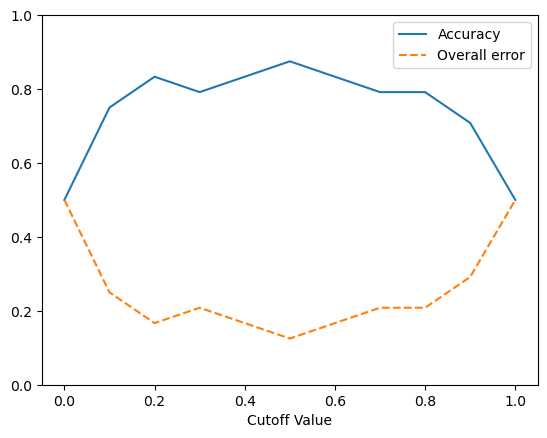

In [ ]:
#GLR65
dfGLR65 = dmba.load_data('liftExample.csv')

cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in dfGLR65.prob]
    accT.append(accuracy_score(dfGLR65.actual, predicted))

line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1 - acc for acc in accT], '--', label='Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])

plt.show()

## ROC

In [ ]:
#GLR65
fpr, tpr, _ = roc_curve(dfGLR65.actual, dfGLR65.prob)
roc_auc = auc(fpr, tpr)

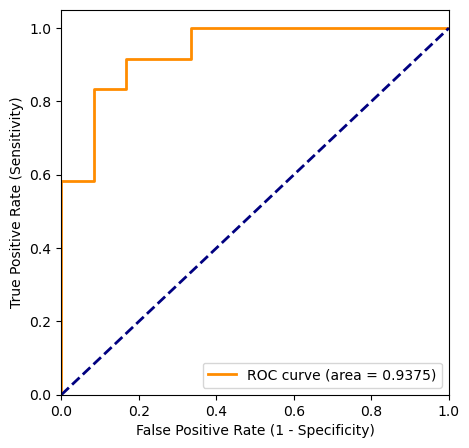

In [ ]:
#GLR65
plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

## Cumulative Gains

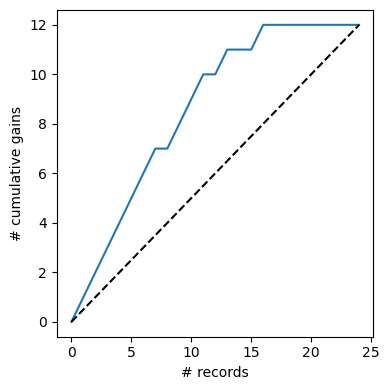

In [ ]:
#GLR65
df = dmba.load_data('liftExample.csv')
df = df.sort_values(by=['prob'], ascending=False)

gainsChart(dfGLR65.actual, figsize=(4, 4))

plt.tight_layout()
plt.show()

## Decile Lift Chart

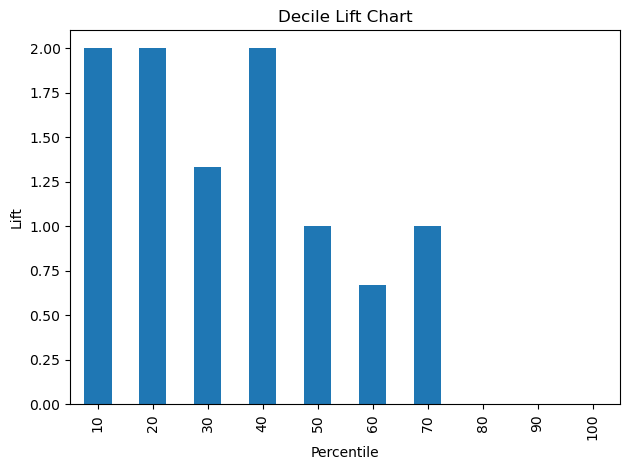

In [ ]:
#GLR65
liftChart(dfGLR65.actual, labelBars=False)
plt.tight_layout()
plt.show()

<span style="color:red">
Solve Problem 5.1 on page 154 of your textbook.
</span>

#GLR65 <BR>
True Positive (TP): 30 <BR>
False Positive (FP): 952 - 920 <BR>
True Negative (TN): 920 <BR>
False Negative (FN): 88 - 30 <BR>
    

In [ ]:
#GLR65
# Given values
TP = 30
FP = 952 - 920
TN = 920
FN = 88 - 30

# Calculating overall error rate
total_misclassifications = FP + FN
total_records = TP + FP + TN + FN
overall_error_rate = total_misclassifications / total_records

print("Overall Error Rate:", overall_error_rate)
print("Confusion Matrix:")
print(conf_matrix)


Overall Error Rate: 0.08653846153846154
Confusion Matrix:
[[58  0]
 [ 0 30]]


<span style="color:red">
Solve Problem 5.2 on page 154 of your textbook.
</span>

a. Classification Error Rate for Truly Fraudulent Records:
   moving the threshold up: As the cutoff increases the fraudulent becomes more conservative, so that gives fewer positive and      fewer negative predictions that is false positive. Also the error rate decreases for truly fraudulent records.
   
   moving the threshold down:As the cutoff decreases the fradulent as it becomes less conservative, so that gives more posituve    and lesser negative predictions. Also the error rates increases for less fraudulent records.
   
b. Classification Error Rate for Truly Nonfraudulent Records:
   Moving the Threshold Up:As the cutoff increases, it becomes more conservative to classify instances more fradulent. That        gives lesser positive and lesser truly negative predictions.The classification error rate for truly nonfraudulent records        might decrease as the positive preditions are fewer.
   
   Moving the Threshold Down: AS the cutoff decreases, it becomes more easy to classify instances are non fradulent. that gives    more positive and more truly negative predictions. Also the error rate increases as it gives more false positive predictions.
   

<span style="color:red">
Solve Problem 5.7 on page 154 of your textbook.
</span>

In [ ]:
#GLR65
#Calculating Error Rates, Sensitivity, and Specificity
import pandas as pd
from sklearn.metrics import confusion_matrix

# Given data
data = {'Propensity': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21,
                       0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
        'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]}

df = pd.DataFrame(data)

#  calculating metrics
def calculate_metrics(predictions, actual):
    tn, fp, fn, tp = confusion_matrix(actual, predictions).ravel()
    error_rate = (fp + fn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return error_rate, sensitivity, specificity

# Cutoffs
cutoffs = [0.25, 0.5, 0.75]

# Calculating metrics for each cutoff
for cutoff in cutoffs:
    predictions = df['Propensity'].apply(lambda x: 1 if x >= cutoff else 0)
    error_rate, sensitivity, specificity = calculate_metrics(predictions, df['Actual'])
    print(f"Cutoff: {cutoff} - Error Rate: {error_rate:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")


Cutoff: 0.25 - Error Rate: 0.4000, Sensitivity: 1.0000, Specificity: 0.5294
Cutoff: 0.5 - Error Rate: 0.1000, Sensitivity: 1.0000, Specificity: 0.8824
Cutoff: 0.75 - Error Rate: 0.0500, Sensitivity: 0.6667, Specificity: 1.0000


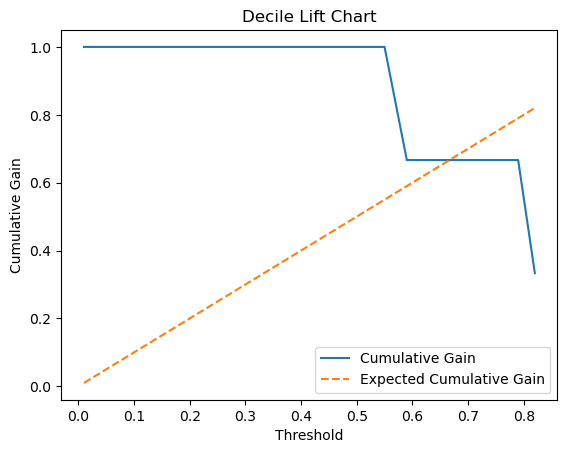

In [ ]:
#GLR65
#Creating a Decile Lift Chart
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Given data
data = {'Propensity': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21,
                       0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
        'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]}

df = pd.DataFrame(data)

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(df['Actual'], df['Propensity'])

# Calculating cumulative gains
cumulative_gains = pd.DataFrame({'Threshold': thresholds, 'Cumulative Gain': tpr})
cumulative_gains['Expected Cumulative Gain'] = cumulative_gains['Threshold']

# Sorting by threshold
cumulative_gains = cumulative_gains.sort_values(by='Threshold')

# Plotting the decile lift chart
plt.plot(cumulative_gains['Threshold'], cumulative_gains['Cumulative Gain'], label='Cumulative Gain')
plt.plot(cumulative_gains['Threshold'], cumulative_gains['Expected Cumulative Gain'], label='Expected Cumulative Gain', linestyle='--')

plt.xlabel('Threshold')
plt.ylabel('Cumulative Gain')
plt.title('Decile Lift Chart')
plt.legend()
plt.show()
